In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\customer_churn-5.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop("customerID",axis=1,inplace=True)

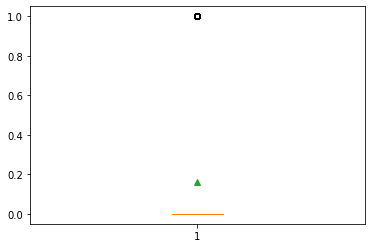

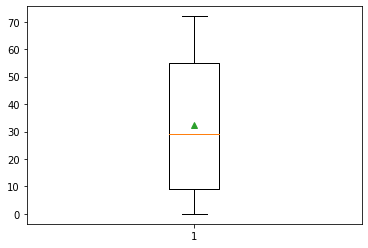

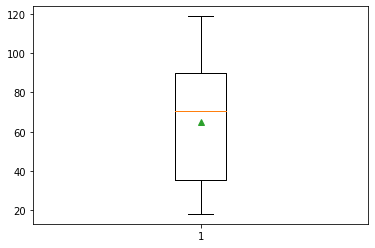

In [7]:

for col in df.columns:
    if(df[col].dtype!="object"):
        plt.boxplot(df[col],showmeans=True)
        plt.show()

In [8]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.columns:
    if(df[col].dtype=="object"):
        df[col]=encoder.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [9]:
#split into x and y
x=df.drop("Churn",axis=1)
y=df["Churn"]
x.shape,y.shape

((7043, 19), (7043,))

In [10]:
#Standardize the data to make all variable contribute equally
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [18]:
#perform pca for dimension reduction
from sklearn.decomposition import PCA
p=PCA(n_components=0.95)
x_pca=p.fit_transform(x)
print("explained variance ration : ",p.explained_variance_ratio_)
print("Number of components : ",p.n_components_)

explained variance ration :  [0.18739044 0.11997282 0.07863015 0.0638669  0.056022   0.05338506
 0.05240746 0.04596042 0.04397289 0.04173069 0.04068978 0.03753215
 0.03685635 0.03606631 0.02963771 0.02801458]
Number of components :  16


In [19]:
#Test_Train_Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4930, 16), (4930,), (2113, 16), (2113,))

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
print("Training Score : ",model.score(x_train,y_train))

Training Score :  0.9983772819472616


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
#Test Score or Prediction Score
y_pred=model.predict(x_test)
print("Test Score : ",accuracy_score(y_test,y_pred))

Test Score :  0.7747278750591576


In [24]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.9939148073022313

In [27]:
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7685754850922859

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train)

array([0.77789047, 0.79006085, 0.76876268, 0.77079108, 0.76977688])